https://www.kaggle.com/datasets/ranaghulamnabi/customer-opinions-and-reactions-dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Customer_Review.csv')
df.head()

,Serial Number,Age,Gender,Review,Education,Purchased
0,1,56,Male,Poor,PG,Yes
1,2,46,Female,Good,School,Yes
2,3,32,Female,Good,PG,No
3,4,25,Female,Average,PG,Yes
4,5,38,Male,Poor,UG,No


In [ ]:
df['Serial Number'].is_unique

True

In [ ]:
df = df.set_index('Serial Number')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        100 non-null    int64 
 1   Gender     100 non-null    object
 2   Review     100 non-null    object
 3   Education  100 non-null    object
 4   Purchased  100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.7+ KB


In [ ]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.Review.unique()

array(['Poor', 'Good', 'Average'], dtype=object)

In [ ]:
df.Education.unique()

array(['PG', 'School', 'UG'], dtype=object)

In [ ]:
df.Purchased.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.Gender.replace({'Male':1, 'Female':0}, inplace=True)
df.Review.replace({'Poor':0, 'Good':1, 'Average':0.5}, inplace=True)
df.Education.replace({'UG':1, 'PG':0.5, 'School':0}, inplace=True)
df.Purchased.replace({'Yes':1, 'No':0}, inplace=True)

/tmp/ipython-input-933212554.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Gender.replace({'Male':1, 'Female':0}, inplace=True)
/tmp/ipython-input-933212554.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Gender.replace({'Male':1, 'Female':0}, inplace=True)
/tmp/ipython-input-9332125

In [ ]:
df

,Age,Gender,Review,Education,Purchased
Serial Number,,,,,
1,56,1,0.0,0.5,1
2,46,0,1.0,0.0,1
3,32,0,1.0,0.5,0
4,25,0,0.5,0.5,1
5,38,1,0.0,1.0,0
...,...,...,...,...,...
96,59,1,1.0,0.0,0
97,56,0,0.0,1.0,1
98,58,0,0.0,0.5,1


Проведена кластеризация данных с помощью алгоритма k-means.
Использовано «правило локтя» и коэффициент силуэта для поиска
оптимального количества кластеров.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score

In [ ]:
models = []
score_cost = []
score_sil = []
for i in range(2, 10):
  model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(df)
  models.append(model)
  score_cost.append(model.inertia_) #значения функции стоимости
  score_sil.append(silhouette_score(df, model.labels_)) #коэффициент cилуэта

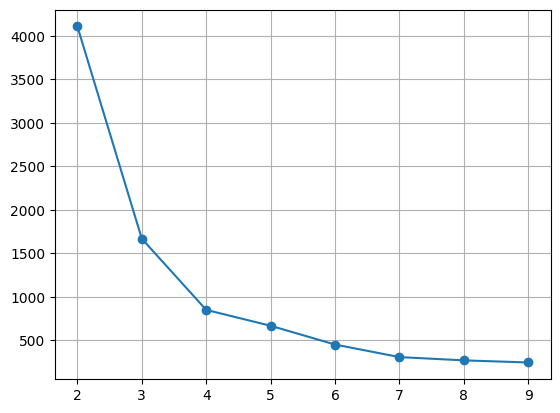

In [ ]:
plt.grid()
plt.plot(np.arange(2, 10), score_cost, marker='o')
plt.show()

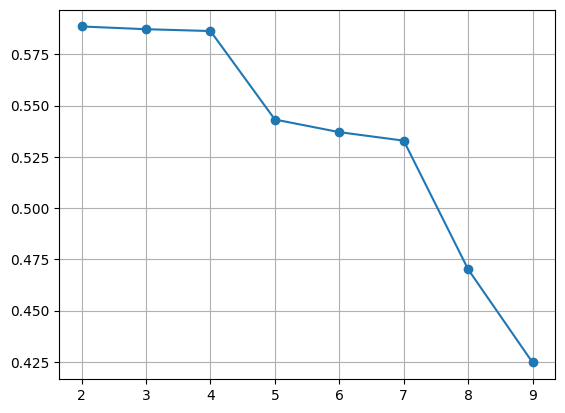

In [ ]:
plt.grid()
plt.plot(np.arange(2, 10), score_sil, marker='o')
plt.show()
# принято решение протестировать модели с 2 и 4 кластерами

In [ ]:
# модели с 4 и 2 кластерами
model_2 = KMeans(n_clusters = 2, random_state=123, init='k-means++')
model_2.fit(df)
model_4 = KMeans(n_clusters = 4, random_state=123, init='k-means++')
model_4.fit(df)

labels_2 = model_2.labels_
labels_4 = model_4.labels_

Кластеризация данных с помощью алгоритма иерархической
кластеризации.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model_alg = AgglomerativeClustering(4, compute_distances=True).fit(df)

Кластеризация данных с помощью алгоритма DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN
model_dbscan = DBSCAN(eps=2, min_samples=4).fit(df)

Визуализация данных

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

T = TSNE(n_components=2, perplexity=25, random_state=123)
TSNE_features = T.fit_transform(df)
DATA = df.copy()
DATA['x'] = TSNE_features[:, 0]
DATA['y'] = TSNE_features[:, 1]

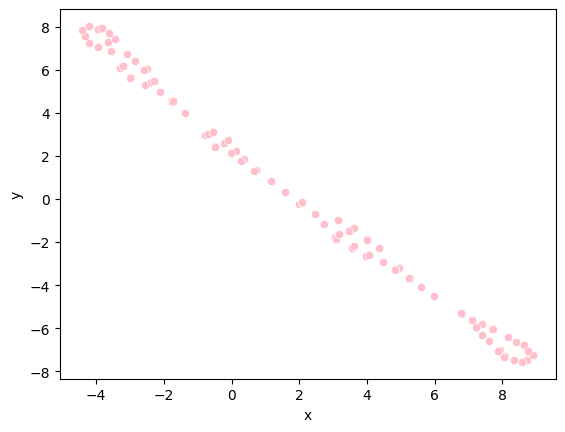

In [ ]:
fig = plt.figure()
sns.scatterplot(x='x', y='y', data=DATA, color = 'pink')
plt.show()

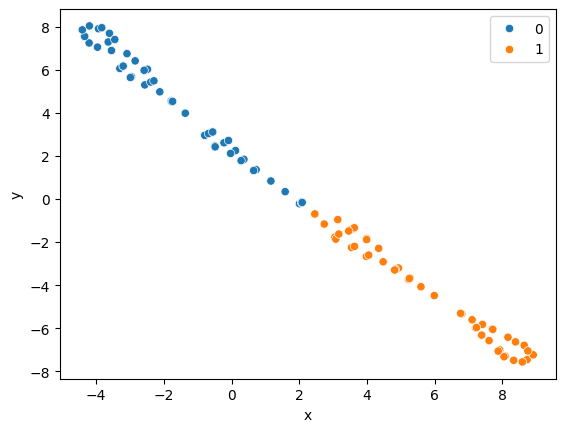

In [ ]:
# k-means 2
fig = plt.figure()
sns.scatterplot(x='x', y='y', data=DATA, hue = labels_2)
plt.show()

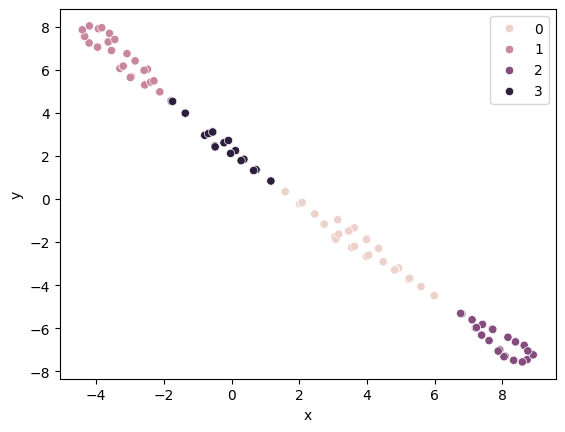

In [ ]:
# k-means 4
fig = plt.figure()
sns.scatterplot(x='x', y='y', data=DATA, hue = labels_4)
plt.show()

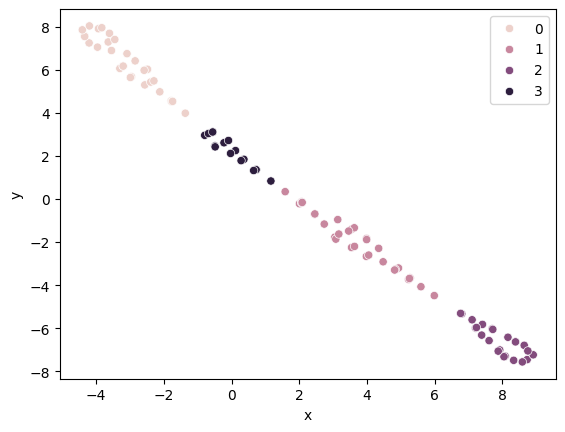

In [ ]:
# AgglomerativeClustering
fig = plt.figure()
sns.scatterplot(x='x', y='y', data=DATA, hue = model_alg.labels_)
plt.show()

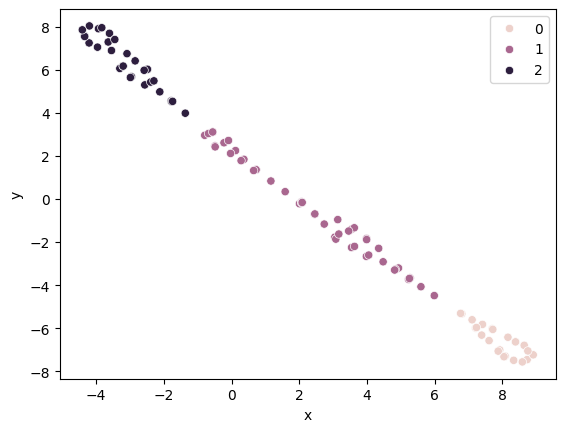

In [ ]:
# dbscan
fig = plt.figure()
sns.scatterplot(x='x', y='y', data=DATA, hue = model_dbscan.labels_)
plt.show()